In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
# density levels from Shemesh et al. 2021
# based on GFP expression on dendrites with
# distance from soma, normalized to soma
# study used CoChR untargeted and soma-targeted

shemesh_etal2021_fig1mn = pd.read_csv('Shemesh_etal2021_fig1mn.csv')

def fit_func(x, b):
    # x-offset of -10 to compensate that the soma is positioned at -10 in their data
    x_offset = -10
    return np.exp(-b * (x - x_offset)) 

/home/david/Software/miniconda3/envs/mioos/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


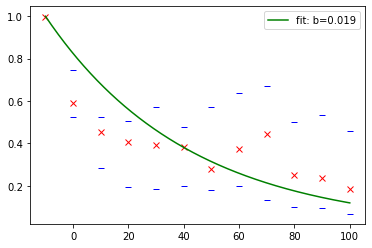

In [3]:
# fit subfigure m
# assume that soma is a ball with 20um diameter. Soma GFP level is 1 as normalized to it.
# -> force fit to go through 1 at x=-10 and fit only exponent to converge to 0 over increasing distance from soma
popt, pcov = curve_fit(
    f=fit_func,
    xdata=shemesh_etal2021_fig1mn.loc[shemesh_etal2021_fig1mn.soma_targeted==False].distance_from_soma,
    ydata=shemesh_etal2021_fig1mn.loc[shemesh_etal2021_fig1mn.soma_targeted==False].GFP_brightness_median)

plot_df = shemesh_etal2021_fig1mn.loc[shemesh_etal2021_fig1mn.soma_targeted==False]
plt.plot(plot_df.distance_from_soma, plot_df.GFP_brightness_median,'rx')
plt.plot(plot_df.distance_from_soma, plot_df.GFP_brightness_q25,'b_')
plt.plot(plot_df.distance_from_soma, plot_df.GFP_brightness_q75,'b_')
plt.plot(np.linspace(-10,100,1000), fit_func(np.linspace(-10,100,1000),*popt), 'g-',
         label='fit: b=%5.3f' % tuple(popt))
plt.legend()

/home/david/Software/miniconda3/envs/mioos/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


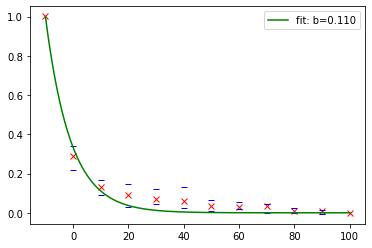

In [4]:
popt, pcov = curve_fit(
    f=fit_func,
    xdata=shemesh_etal2021_fig1mn.loc[shemesh_etal2021_fig1mn.soma_targeted==True].distance_from_soma,
    ydata=shemesh_etal2021_fig1mn.loc[shemesh_etal2021_fig1mn.soma_targeted==True].GFP_brightness_median)

plot_df = shemesh_etal2021_fig1mn.loc[shemesh_etal2021_fig1mn.soma_targeted==True]
plt.plot(plot_df.distance_from_soma, plot_df.GFP_brightness_median,'rx')
plt.plot(plot_df.distance_from_soma, plot_df.GFP_brightness_q25,'b_')
plt.plot(plot_df.distance_from_soma, plot_df.GFP_brightness_q75,'b_')
plt.plot(np.linspace(-10,100,1000), fit_func(np.linspace(-10,100,1000),*popt), 'g-',
         label='fit: b=%5.3f' % tuple(popt))
plt.legend()